In [1]:
import sys
import configparser as cp
import numpy as np
import scipy.io
import os
import time
import multiprocessing
from driftDiffusionSimulatorBase import driftDiffusionSimulatorBase
from driftDiffusionSimulatorFullCircle import driftDiffusionSimulatorFullCircle
from myGeometryFunctions import *
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [24]:
initFile = 'fullCircle_debugData.txt'

Temp = 25
partDensity = 25
probeCenterX = 6
probeCenterY= 6

constrictionWidth = 0.3
pScatter = 0
sourceDrainRatio = 1.2
Nsteps = 1000
dNsave = 100
diameter = 10
injectH, injectW = 1.5, .6

collisionDist = 0.05
stepSize = 0.01

Ncpu = 1
outPath = './'

splitName = initFile.split('.')
if len(splitName) == 2:
    fnameBase = initFile .split('.')[0]
elif len(splitName) == 3:
    fnameBase = '.'.join([initFile .split('.')[0], initFile .split('.')[1]])
elif len(splitName) == 4:
    fnameBase = '.'.join([initFile .split('.')[0], initFile .split('.')[1], initFile .split('.')[2]])
# fnameBaseREDUCED = fnameBase+'_REDUCED'

In [25]:
dSim = driftDiffusionSimulatorFullCircle()
dSim.setDiameter(diameter)
dSim.probeCenterX = probeCenterX
dSim.probeCenterY = probeCenterY
dSim.setConstrictionWidth(constrictionWidth)
dSim.setInjectorShape(injectW,injectH)
dSim.updateScatterProb(pScatter)
dSim.Temp = Temp
dSim.partDensity = partDensity
dSim.setSourceDrainRatio(sourceDrainRatio)
dSim.setOverlapRadius(collisionDist)
dSim.setStepSize(stepSize)

dSim.setEmin(dSim.partDensity, dSim.Temp)
dSim.calcArea()
dSim.setNpart(dSim.partDensity, dSim.Area)
dSim.updateBody()
dSim.addTip()
dSim.updateNparticles()

In [26]:
fnameOut = "./FullCircle_simulation/"+fnameBase+"/"+fnameBase+("_%03d"%0)+".npz"
# fnameOutREDUCED = "./FullCircle_simulation/"+fnameBaseREDUCED+"/"+fnameBaseREDUCED+("_%03d"%0)+".npz"
dSim.runAndSave(Nsteps,dNsave,fnameOut)#,fnameOutREDUCED)


0:  0.0315831
100:  1.75169
200:  1.76538
300:  1.79302
400:  1.76235
500:  1.7555
600:  1.82384
700:  1.75479
800:  1.75006
900:  1.82478


(-5.56547280314566, 7.074282608064794, -5.26462089020153, 7.060154109267341)

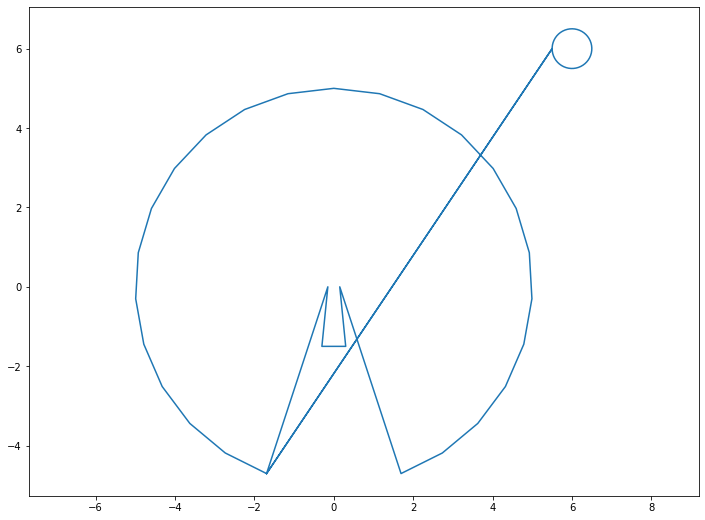

In [27]:
fig, ax = plt.subplots(figsize=[12,9])
ax.plot(dSim.borderX, dSim.borderY)
ax.axis('equal')

In [20]:
dSim.borderPath.contains_points(np.vstack((5,5)).T)

array([ True])